# p_2.1
$p=(1-\epsilon)+\epsilon*(1-\epsilon)=0.5+0.5*0.5=0.75$

# 2.3 10臂赌博机生成

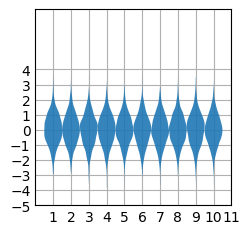

0 th mean:  0.018712776142203822
1 th mean:  0.02853281276597762
2 th mean:  -0.038289270286620616
3 th mean:  -0.006253441349623662
4 th mean:  0.0056118793472439
5 th mean:  -0.031968463547420146
6 th mean:  -0.018617480414697626
7 th mean:  0.003295785848152213
8 th mean:  0.03297462350730353
9 th mean:  -0.0003400665992060654


In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data:
np.random.seed(10)

mean_normal=(0,0,0,0,0,0,0,0,0,0)
var_normal=(1,1,1,1,1,1,1,1,1,1)
D = np.random.normal(mean_normal, var_normal, (2000, 10))

# plot:
fig, ax = plt.subplots()
xx=[1,2,3,4,5,6,7,8,9,10]

vp = ax.violinplot(D, xx, widths=1,
                   showmeans=False, showmedians=False, showextrema=False)
# styling:
for body in vp['bodies']:
    body.set_alpha(0.9)
ax.set(xlim=(0, 8), xticks=np.arange(1, 12),
       ylim=(0, 8), yticks=np.arange(-5, 5))

plt.show()

for i in range(10):
    col=D[:,i:i+1]
    mean=np.mean(col)
    print(i,"th mean: ",mean)



# 2.3  $\epsilon$ 贪心策略实验

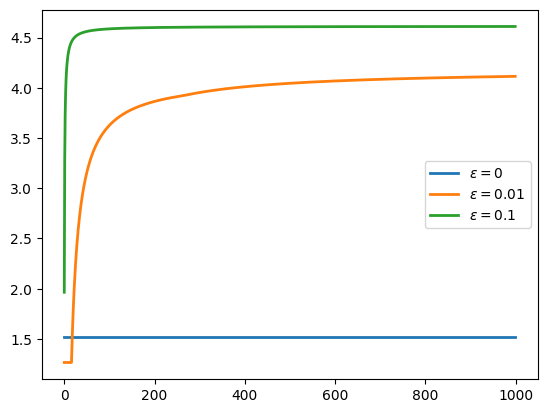

In [78]:
import matplotlib.pyplot as plt
import numpy as np


class arm_bandit:
    def __init__(self):
        self.max_reward=0.0
        self.value_array=np.array([])
    def next(self):
        reward_value=np.random.normal(0,1,1)
        if reward_value>self.max_reward:
            self.max_reward=reward_value
        self.value_array=np.append(self.value_array,reward_value)
        return self.max_reward
class game_arm10:
    def __init__(self,epsilon):
        self.epsilon=epsilon
        self.arm_list=[]
        self.cur_max_index=0
        self.cur_max_value=0
        for i in range(10):
            arm=arm_bandit()
            max_value=arm.next()
            arm_list.append(arm)
            if max_value>self.cur_max_value:
                self.cur_max_value=max_value
                self.cur_max_index=i
        
    def is_greedy(self):
        xs = np.random.uniform(0, 1, size=1)
        if xs>=self.epsilon:
            return True
        else:
            return False
        
    def update(self):
        greedy=self.is_greedy()
        if greedy==True:
            return self.cur_max_value
        else:
            index = int(np.random.uniform(0, 10, size=1)[0])
            value=arm_list[index].next()
            if value>self.cur_max_value:
                self.cur_max_value=value
                self.cur_max_index=index
            return self.cur_max_value
        

epoch=1000

reward_list1=[]
game1=game_arm10(0.0)
reward_mean1=0

reward_list2=[]
game2=game_arm10(0.01)
reward_mean2=0

reward_list3=[]
game3=game_arm10(0.1)
reward_mean3=0

for i in range(epoch):
    value1=game1.update()
    reward_mean1=(reward_mean1*i+value1)/(i+1)
    reward_list1.append(reward_mean1)
    
    value2=game2.update()
    reward_mean2=(reward_mean2*i+value2)/(i+1)
    reward_list2.append(reward_mean2)
    
    value3=game3.update()
    reward_mean3=(reward_mean3*i+value3)/(i+1)
    reward_list3.append(reward_mean3)

fig, ax = plt.subplots()

ax.plot(reward_list1, linewidth=2.0,label=r'$\epsilon=0$')
ax.plot(reward_list2, linewidth=2.0,label=r'$\epsilon=0.01$')
ax.plot(reward_list3, linewidth=2.0,label=r'$\epsilon=0.1$')


ax.legend()

plt.show()